In [162]:
import numpy as np
import matplotlib.pyplot as plt

In [163]:
X = np.random.rand(300, 1)
y = 5 + 6 * X + np.random.randn(300, 1)
y = y.reshape((300,))

In [164]:
X.shape, y.shape

((300, 1), (300,))

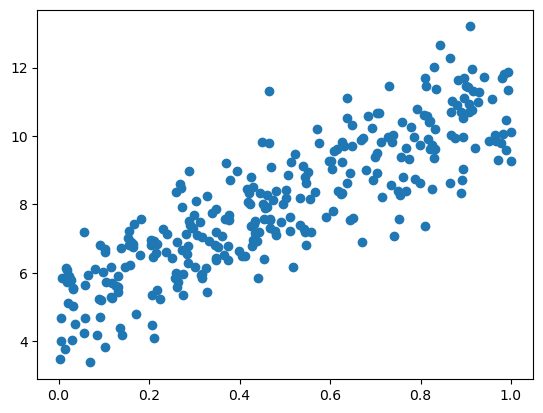

In [165]:
plt.scatter(X, y)

In [166]:
N = 300
Beta = np.random.randn(2)
n_iter = 300
X_exp = np.concatenate((np.ones((300, 1)), X), axis=1)

La fonction de descent de gradient que j'ai implémenté est la suivante : 1/N X.t(Xß - y)

# Check if my MSE formula without sum is good

In [167]:
from sklearn.metrics import mean_squared_error
from metrics import Metrics

In [168]:
skl_mse_v = round(mean_squared_error(y, X_exp.dot(Beta)), 5)
my_mse_v = round(Metrics.mse(X_exp, y, Beta), 5)

assert(skl_mse_v == my_mse_v)

# Find best learning rate

In [169]:
%reload_ext autoreload
%autoreload 2

from gradient_descent import GradientDescent

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

In [171]:
model = SGDRegressor()

grid_s = GridSearchCV(model, {
  "learning_rate": ["constant", "optimal", "invscaling"],
})

grid_s.fit(X_exp, y)
grid_s.best_params_

{'learning_rate': 'constant'}

2.9424189626130275
0.9805368432575924
24.951975633705697
38.90771930273397


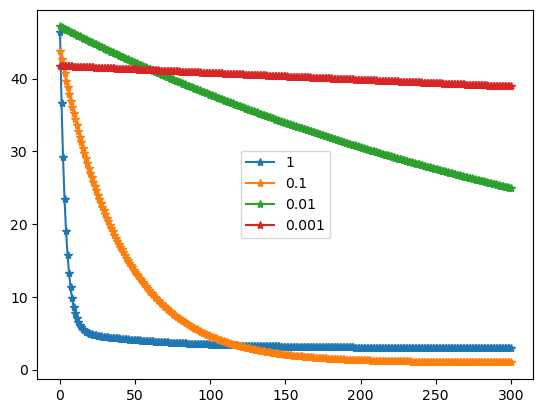

In [172]:
for r in [1, 0.1, 0.01, 0.001]:
  _, losses = (GradientDescent(X_exp, y, lr=r)).batch(n_iter, beta=Beta)
  print(min(losses))
  plt.plot(losses, marker="*", label=r)

plt.legend()
plt.show()

On peut constater que si le learning rate est trop petit le model n'arrive pas à correctement généraliser. On peut également constater que si le learning rate est trop grand le modèle va "trop vite" ce qui n'est pas gênant dans notre cas mais peut l'être dans d'autres

In [173]:
lr = 1e-1
gd = GradientDescent(X_exp, y, lr)
betas, losses = gd.batch(n_iter, beta=Beta)

In [174]:
import matplotlib.pyplot as plt

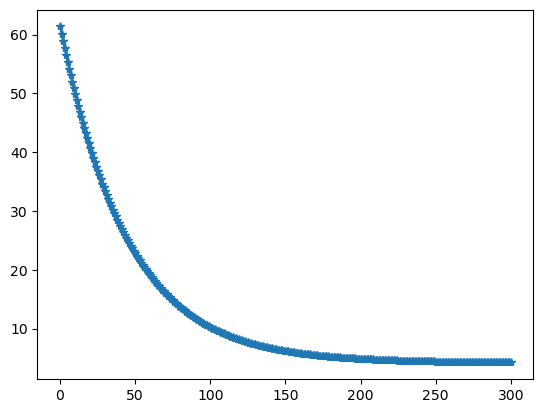

In [175]:
plt.plot(losses, marker="*", label=lr)